In [1]:
import dtoolcore
import dtoolcore.utils as utils
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re
import matplotlib as mpl

In [63]:
def ret_fig_ax(rows=1, cols=1):
    fig_width_pt = 448.13095  # Replace with your document's text width
    inches_per_pt = 1 / 72.27
    fig_width_in = fig_width_pt * inches_per_pt
    fig, ax = plt.subplots(rows,cols, figsize=( fig_width_in, fig_width_in), sharey=True)
    return fig, ax

from pathlib import Path
os.environ["PATH"] += os.pathsep + str(Path.home() / "bin")

mpl.rcParams['text.usetex'] = False

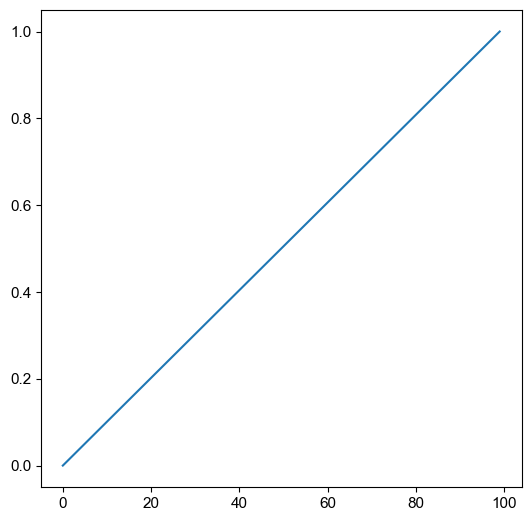

In [64]:
mpl.rcParams.update({
    "font.sans-serif": ["Arial"],
    "font.cursive": ["Arial"],
    "font.family": "serif",
    "font.serif": ["Arial"],
    "font.size": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 14,
    "svg.fonttype": "none"
})
#                      

fig, ax = ret_fig_ax()
ax.plot(np.linspace(0,1,100, endpoint=True))
#ax[1].plot(np.linspace(1,0,100, endpoint=True))
plt.show()

In [4]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/new_run/"
#print(path)
def get_data_directories(root_dir):
    data_dirs = []
    for root, dirs, files in os.walk(root_dir):
        if root.endswith('/data'):
            data_dirs.append(root)
    return data_dirs

datadir_list = get_data_directories(path)

In [5]:
datadir_list


['/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.04_1194.3/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.00_1060.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.47_925.7/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.00_522.9/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.47_1865.7/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.60_1865.7/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.04_120.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_run/parametric2_canal_0.34_1060.0/data',
 '/home/sick/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/plot_radials/new_

In [ ]:
def plot_res(pt, file, title, yl='Massflowrate in kg/s', fkt=np.mean, legend=False):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    for i in datadir_list:
        if "_3" in i:
            match = re.search(pt, i)
            extracted = match.group()
            if cu ==0:
                mfl = np.loadtxt(i+file).reshape(1, -1)
                cu += 1
                ax.scatter(float(extracted), fkt(mfl[0,:]))
            else:
                mfl = np.append(mfl, np.loadtxt(i+file).reshape(1, -1), axis=0)
                cu+=1
                ax.scatter(float(extracted),fkt(mfl[cu-1,:]))
    if legend:
        ax.legend()
    ax.set_xlabel(r'radius in r/H', fontsize=14)
    ax.set_ylabel(yl, fontsize=14)

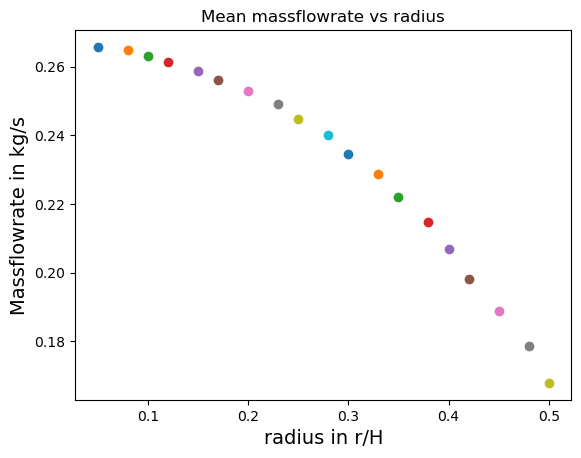

In [63]:
plot_res(pat, "/massflowrate.txt", "Mean massflowrate vs radius")

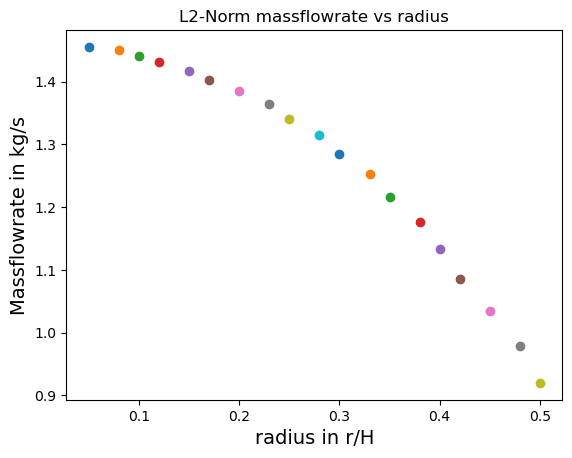

In [16]:
plot_res(pat, "/massflowrate.txt", "L2-Norm massflowrate vs radius", fkt=np.linalg.norm)


In [ ]:
def ret_mid_element(x):
    return x[int(x[0].size/2)]

#plot_res(pat, "/massflowrate.txt", "massflowrate at obstacle vs radius", fkt=ret_mid_element)

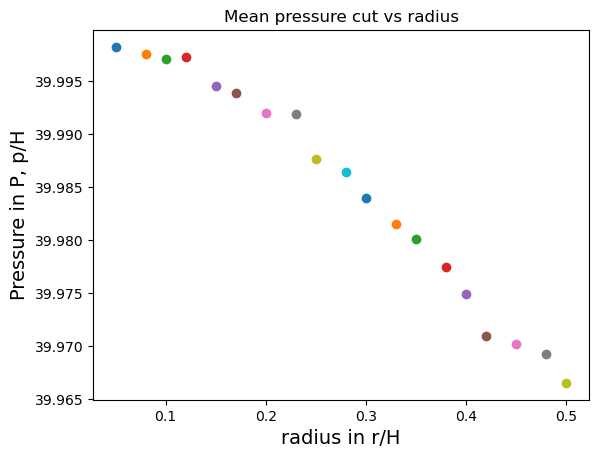

In [17]:
plot_res(pat, "/pressure_avg.txt", "Mean pressure cut vs radius", yl="Pressure in P, p/H")

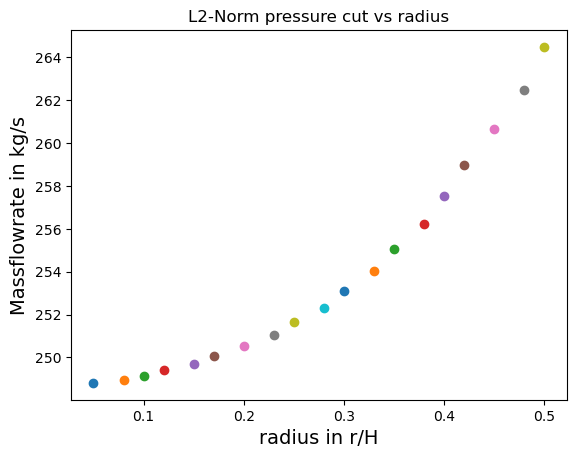

In [18]:
plot_res(pat, "/pressure_avg.txt", "L2-Norm pressure cut vs radius", fkt=np.linalg.norm)

/tmp/ipykernel_7153/283100055.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


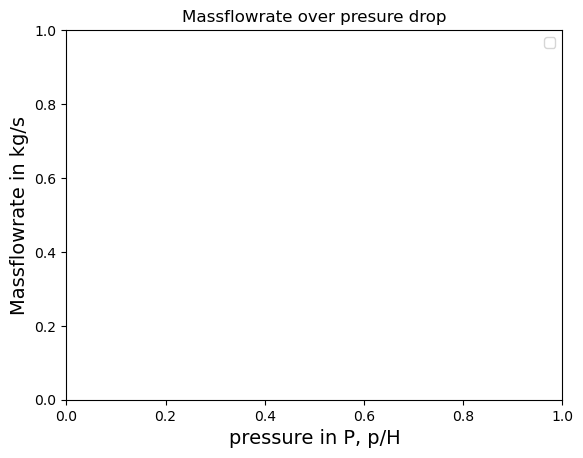

In [29]:
def plot_amp(pt, file, title, yl='Massflowrate in kg/s', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    for i in datadir_list:
        if "3.txt" in i:
            match = re.search(pt, i)
            extracted = match.group()
            if cu ==0:
                mfl = np.loadtxt(i+file)
                pr_delta = np.linspace(80,0,mfl.size)
                pr = np.loadtxt(i+"/pressure_avg.txt")
                cu += 1
                ax.plot(pr, mfl, label=f'r= {extracted:s}')
            elif cu in s:
                mfl = np.loadtxt(i+file)
                pr_delta = np.linspace(80,0,mfl.size)
                pr = np.loadtxt(i+"/pressure_avg.txt")
                cu+=1
                ax.plot(pr, mfl, label=f'r= {extracted:s}')
            cu+=1
        if legend:
            ax.legend()
        ax.set_xlabel(r'pressure in P, p/H', fontsize=14)
        ax.set_ylabel(yl, fontsize=14)

plot_amp(pat,"/massflowrate.txt","Massflowrate over presure drop")

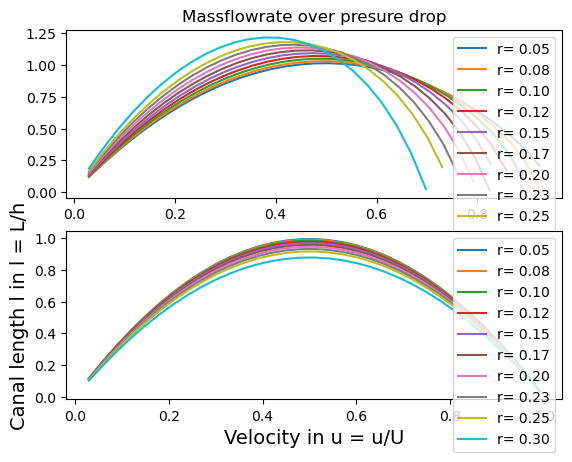

In [55]:
def plot_amp(pt, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots(2)
    ax[0].set_title(title)
    cu = 0
    for i in datadir_list:
        match = re.search(pt, i)
        extracted = match.group()
        if cu ==0:
            u = np.loadtxt(i+file)
            pr = np.loadtxt(i+"/y_at_.5.txt")
            u2 = np.loadtxt(i+"/x_at_1.txt")
            pr2 = np.loadtxt(i+"/y_at_1.txt")
            cu += 1
            ax[0].plot(u,pr, label=f'r= {extracted:s}')
            ax[1].plot(u2,pr2, label=f'r= {extracted:s}')
        elif cu in s:
            u = np.loadtxt(i+file)
            pr = np.loadtxt(i+"/y_at_.5.txt")
            u2 = np.loadtxt(i+"/x_at_1.txt")
            pr2 = np.loadtxt(i+"/y_at_1.txt")
            cu+=1
            ax[0].plot(u,pr, label=f'r= {extracted:s}')
            ax[1].plot(u2,pr2, label=f'r= {extracted:s}')
        cu+=1
    if legend:
        ax[0].legend()
        ax[1].legend()
    ax[1].set_xlabel(r'Velocity in u = u/U', fontsize=14)
    ax[1].set_ylabel(r'Canal length l in l = L/h', fontsize=14)

plot_amp(pat,"/x_at_.5.txt","Massflowrate over presure drop")

In [70]:
radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,])
press = np.linspace(20,2300,15)

pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'


for k in datadir_list:
    print(k)
    break
    match = re.search(pat, k)
    match2 = re.search(pat2, k)
    extracted = match.group()
    extracted2 = match2.group()
    print(extracted, extracted2)

/home/ilia/Documents/GIT/bsc-ilia-fedotov/conda/mpi_run/dtool_db/parametric_canal_0.01_20.0/data


[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [ 120.   254.3  388.6  522.9  657.1  791.4  925.7 1060.  1194.3 1328.6
 1462.9 1597.1 1731.4 1865.7 2000. ] (15, 15)
[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [ 120.   254.3  388.6  522.9  657.1  791.4  925.7 1060.  1194.3 1328.6
 1462.9 1597.1 1731.4 1865.7 2000. ] (15, 15)


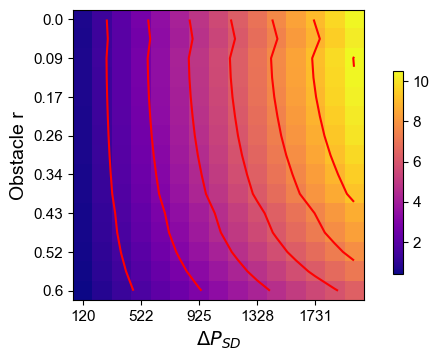

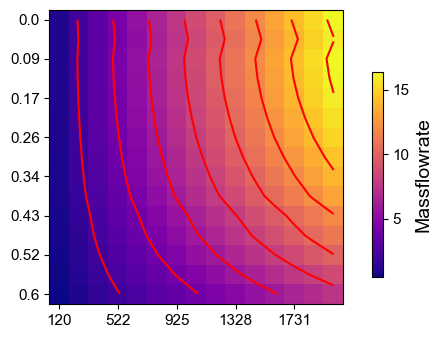

In [61]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title,ax, yl='Velocity', legend=True):
    #fig, ax = plt.subplots()
    #ax.set_title(title)

    radii_list, press_list = [], []
    
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list

    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    arr = np.empty((len(radii), len(press)))
    print(radii, press, arr.shape)
    
    for i in datadir_list:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        # print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()

        u = np.loadtxt(i+file)
        u = np.mean(u[(u >= 0) & (u <= 100)])
        #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
        arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u*10


    # neg = ax.contour(arr)
    neg = ax.imshow(arr, cmap="plasma")
    ax.contour(arr, colors='red')

    x_ticks = np.arange(0, len(press), 3) 
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(press[x_ticks].astype(int))
    
    # For y-axis (radii)
    y_ticks = np.arange(0, len(radii), 2) 
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(radii[y_ticks])

    if not legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label="Massflowrate")
        ax.set_xlabel(r'    ')
    
    if legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
        ax.set_ylabel(r'Obstacle r')#, fontsize=14)
        ax.set_xlabel(r'$\Delta P_{SD}$')#, fontsize=14)

    #ax.set_title("Massflowrates L=10,dp=20-2300")
    plt.tight_layout()
    return ax,arr, radii, press 

fig, ax = ret_fig_ax()
ax, arr, radii, press  = plot_mfl(pat, pat2, "/massflowrate_0.10/massflowrate.txt", "Massflowrate",ax, yl='P delta', legend=True)
fig.savefig("flux_1.pdf", format='pdf', dpi=300, bbox_inches='tight')
fig, ax2  = ret_fig_ax()
ax2, arr2, radii2, press2  = plot_mfl(pat, pat2, "/massflowrate_0.50/massflowrate.txt", "Massflowrate",ax2, yl='P delta', legend=False)
fig.savefig("flux_6.pdf", format='pdf', dpi=300, bbox_inches='tight')


[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [ 120.   254.3  388.6  522.9  657.1  791.4  925.7 1060.  1194.3 1328.6
 1462.9 1597.1 1731.4 1865.7 2000. ] (15, 15)
[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [ 120.   254.3  388.6  522.9  657.1  791.4  925.7 1060.  1194.3 1328.6
 1462.9 1597.1 1731.4 1865.7 2000. ] (15, 15)


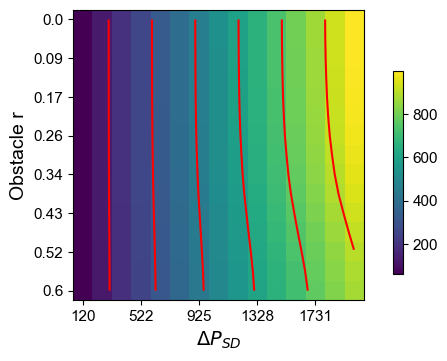

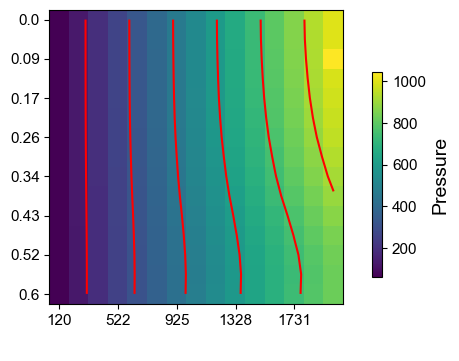

In [30]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'
import time

def get_arr(pt, pt2, file,radii_list, press_list):
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list

    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    arr = np.empty((len(radii), len(press)))
    print(radii, press, arr.shape)
    
    for i in datadir_list:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        # print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()
        
        u = np.loadtxt(i+file).astype(np.float64)
        u = np.max( u[u<3000] )

        #print(i+file)
        
        #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
        r_index, p_index = np.where(radii == float(extracted))[0], np.where(press == float(extracted2))[0]
        #print(r_index,p_index,np.max(u))
        arr[r_index, p_index] = u
        #arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]
    return arr, radii_list, press_list, radii, press



def plot_pres(pt, pt2, file, title,ax, yl='Velocity', legend=True):
    #fig, ax = plt.subplots()
    #ax.set_title(title)
    radii_list, press_list = [], []
    arr, radii_list, press_list, radii, press = get_arr(pt, pt2, file,radii_list, press_list)

    # neg = ax.contour(arr)
    neg = ax.imshow(arr)
    ax.contour(arr, colors='red')

    x_ticks = np.arange(0, len(press), 3) 
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(press[x_ticks].astype(int))
    
    # For y-axis (radii)
    y_ticks = np.arange(0, len(radii), 2) 
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(radii[y_ticks])

    if not legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label="Pressure")
        ax.set_xlabel(r'    ')
    
    if legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
        ax.set_ylabel(r'Obstacle r')#, fontsize=14)
        ax.set_xlabel(r'$\Delta P_{SD}$')#, fontsize=14)

    #ax.set_title("Massflowrates L=10,dp=20-2300")
    plt.tight_layout()
    return ax, arr, radii, press 

fig, ax = ret_fig_ax()
ax, arr,radii, press  = plot_pres(pat, pat2, "/p_at_5_0.10/p_at_5.txt", "Pressure",ax, yl='P delta', legend=True)
fig.savefig("pressure_1.pdf", format='pdf', dpi=300, bbox_inches='tight')
fig, ax2  = ret_fig_ax()
ax2, arr2, radii2, press2  = plot_pres(pat, pat2, "/p_at_5_0.60/p_at_5.txt", "Pressure",ax2, yl='P delta', legend=False)
fig.savefig("pressure_6.pdf", format='pdf', dpi=300, bbox_inches='tight')

In [68]:
arr2.shape
colors = plt.cm.rainbow(np.linspace(0, 1, 15))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.58823529e-01, 2.19946358e-01, 9.93859137e-01, 1.00000000e+00],
       [2.17647059e-01, 4.29120609e-01, 9.75511968e-01, 1.00000000e+00],
       [7.64705882e-02, 6.17278221e-01, 9.45183828e-01, 1.00000000e+00],
       [7.25490196e-02, 7.82927610e-01, 9.00586702e-01, 1.00000000e+00],
       [2.13725490e-01, 9.00586702e-01, 8.46958211e-01, 1.00000000e+00],
       [3.54901961e-01, 9.74138602e-01, 7.82927610e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [6.45098039e-01, 9.74138602e-01, 6.22112817e-01, 1.00000000e+00],
       [7.86274510e-01, 9.00586702e-01, 5.31659467e-01, 1.00000000e+00],
       [9.27450980e-01, 7.82927610e-01, 4.34676422e-01, 1.00000000e+00],
       [1.00000000e+00, 6.17278221e-01, 3.26538713e-01, 1.00000000e+00],
       [1.00000000e+00, 4.29120609e-01, 2.19946358e-01, 1.00000000e+00],
       [1.00000000e+00, 2.19946358e-01, 1.10652682e

(15,)


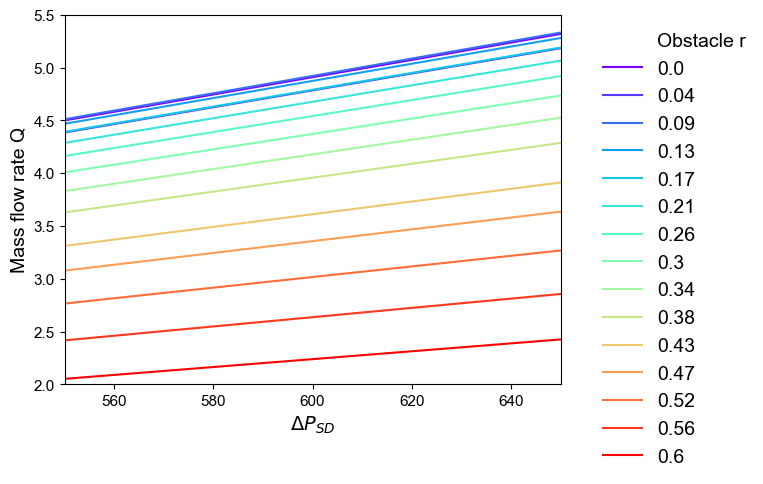

In [71]:
custom_line = plt.Line2D([0], [0],color='none', marker='', linestyle='', lw=2)

plt.legend([custom_line] + plt.gca().get_legend_handles_labels()[0],
           ['Obstacle r'] + plt.gca().get_legend_handles_labels()[1])

colors = plt.cm.rainbow(np.linspace(0, 1, 15))
print(radii.shape)
lines = plt.plot(press, arr2.T, label=radii)
plt.ylabel(r'Mass flow rate Q')#, fontsize=14)
plt.xlabel(r'$\Delta P_{SD}$')#, fontsize=14)
plt.xlim(550,650)
plt.ylim(2,5.5)

for line, color in zip(lines, colors):
    line.set_color(color)
plt.legend([custom_line] + plt.gca().get_legend_handles_labels()[0],
           ['Obstacle r'] + plt.gca().get_legend_handles_labels()[1],
           frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
fig = plt.gcf()
fig.savefig("mfl_linear_55-65.pdf", format='pdf', dpi=300, bbox_inches='tight')

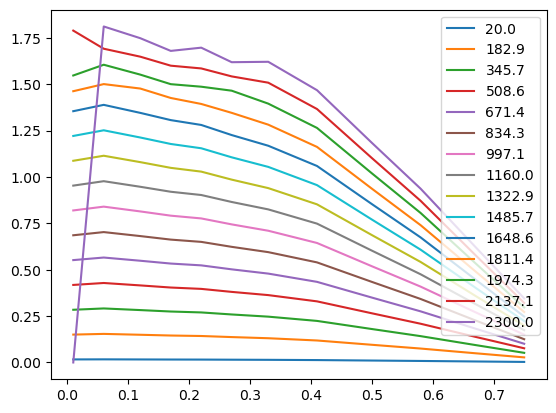

In [53]:
radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
press = np.round(np.linspace(20,2300,15),1)
plt.plot(radii, ret, label=press)
plt.legend(frameon=False)

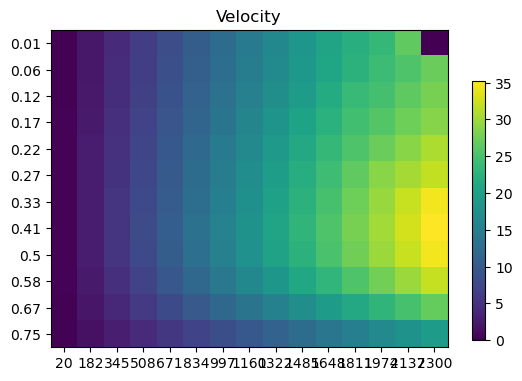

In [46]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
    press = np.round(np.linspace(20,2300,15),1)
    arr = np.empty((12, 15))
    for i in datadir_list:
        if "parametric_canal" not in i:
            continue
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        if cu ==0:
            u = np.loadtxt(i+file+"")
            cu += 1
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            cu+=1
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_5_0.60/y_at_5.txt", "Velocity", yl='P delta', legend=True)

[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [ 120.   254.3  388.6  522.9  657.1  791.4  925.7 1060.  1194.3 1328.6
 1462.9 1597.1 1731.4 1865.7 2000. ] (15, 15)
[0.   0.04 0.09 0.13 0.17 0.21 0.26 0.3  0.34 0.38 0.43 0.47 0.52 0.56
 0.6 ] [ 120.   254.3  388.6  522.9  657.1  791.4  925.7 1060.  1194.3 1328.6
 1462.9 1597.1 1731.4 1865.7 2000. ] (15, 15)


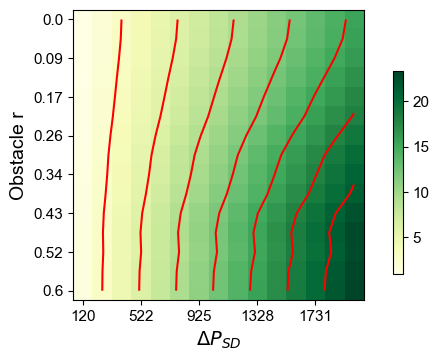

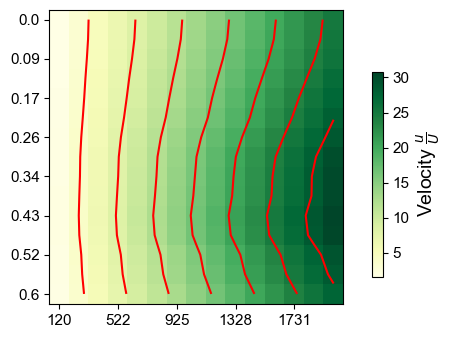

In [43]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'
import time

def get_arr(pt, pt2, file,radii_list, press_list):
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list

    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    arr = np.empty((len(radii), len(press)))
    print(radii, press, arr.shape)
    
    for i in datadir_list:
        if not re.search(r'.*(parametric2_canal_[^/]+)/data', i):
            continue
        # print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()

        u = np.loadtxt(i+file).astype(np.float64)
        u = np.max( u)

        #print(i+file)
        
        #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
        r_index, p_index = np.where(radii == float(extracted))[0], np.where(press == float(extracted2))[0]
        #print(r_index,p_index,np.max(u))
        arr[r_index, p_index] = u
        #arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]
    return arr, radii_list, press_list, radii, press



def plot_y(pt, pt2, file, title,ax, yl='Velocity', legend=True):
    #fig, ax = plt.subplots()
    #ax.set_title(title)
    radii_list, press_list = [], []
    arr, radii_list, press_list, radii, press = get_arr(pt, pt2, file,radii_list, press_list)

    # neg = ax.contour(arr)
    neg = ax.imshow(arr, cmap='YlGn')
    ax.contour(arr, colors='red')

    x_ticks = np.arange(0, len(press), 3) 
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(press[x_ticks].astype(int))
    
    # For y-axis (radii)
    y_ticks = np.arange(0, len(radii), 2) 
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(radii[y_ticks])

    if not legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label=r'Velocity $\frac{u}{U}$')
        ax.set_xlabel(r'    ')
    
    if legend:
        fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
        ax.set_ylabel(r'Obstacle r')#, fontsize=14)
        ax.set_xlabel(r'$\Delta P_{SD}$')#, fontsize=14)

    #ax.set_title("Massflowrates L=10,dp=20-2300")
    plt.tight_layout()
    return ax, arr, radii, press 

fig, ax = ret_fig_ax()
ax, arr,radii, press  = plot_y(pat, pat2, "/y_at_5_0.10/y_at_5.txt", "Pressure",ax, yl='P delta', legend=True)
fig.savefig("velo_1.pdf", format='pdf', dpi=300, bbox_inches='tight')
fig, ax2  = ret_fig_ax()
ax2, arr2, radii2, press2  = plot_y(pat, pat2, "/y_at_5_0.60/y_at_5.txt", "Pressure",ax2, yl='P delta', legend=False)
fig.savefig("velo_6.pdf", format='pdf', dpi=300, bbox_inches='tight')

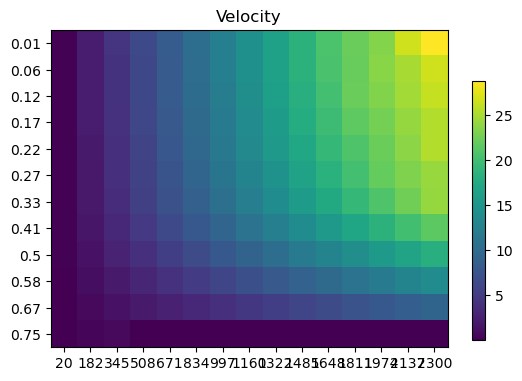

In [108]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.12,.17,.22,.27,.33,.41,.50,.58,.67,.75])
    press = np.round(np.linspace(20,2300,15),1)
    arr = np.empty((12, 15))
    for i in datadir_list:
        #print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        #print(extracted)
        #print(extracted2)
        if cu ==0:
            u = np.loadtxt(i+file+"")
            #print(i)
            #print(u)
            cu += 1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            #print(i)
            #print(u)
            cu+=1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_0_0.60/y_at_0.txt", "Velocity", yl='P delta', legend=True)

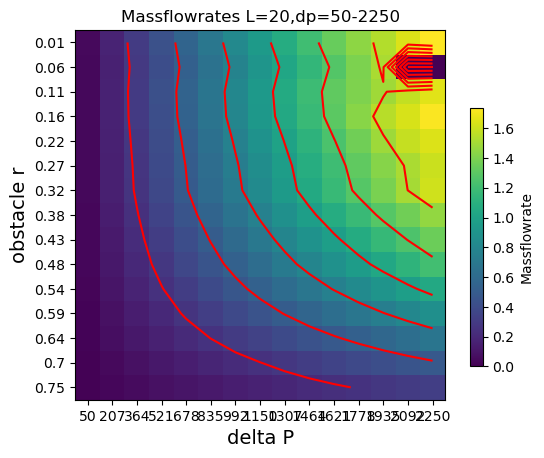

In [66]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
    press = np.round(np.linspace(50,2250,15),1)
    arr = np.empty((15, 15))
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue
        # print(i+file)
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        if match == None:
            print("match",i)
        if match2 == None:
            print("match2",i)
        extracted = match.group()
        extracted2 = match2.group()
        if cu ==0:
            u = np.loadtxt(i+file)
            #print(i+file)
            #print(u)
            cu += 1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]

        else:
            if not os.path.exists(i+file):
                print(i+file)
            u = np.loadtxt(i+file)
            #print(i+file)
            #print(u)
            cu+=1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = u[0]

    # neg = ax.contour(arr)
    neg = ax.imshow(arr)
    ax.contour(arr, colors='red')
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7, label="Massflowrate")
    #if legend:
    #    ax.legend()
    ax.set_ylabel(r'obstacle r', fontsize=14)
    ax.set_xlabel(r'delta P', fontsize=14)
    ax.set_title("Massflowrates L=20,dp=50-2250")
    return arr

ret = plot_mfl(pat, pat2, "/massflowrate_0.60/massflowrate.txt", "Massflowrate", yl='P delta', legend=True)


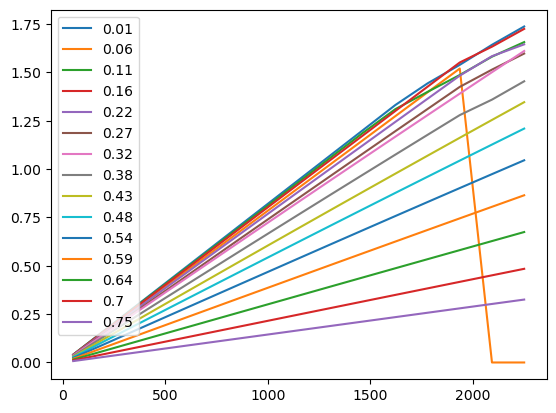

In [61]:
radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
press = np.round(np.linspace(50,2250,15),1)
plt.plot(press, ret.T, label=radii)
plt.legend()

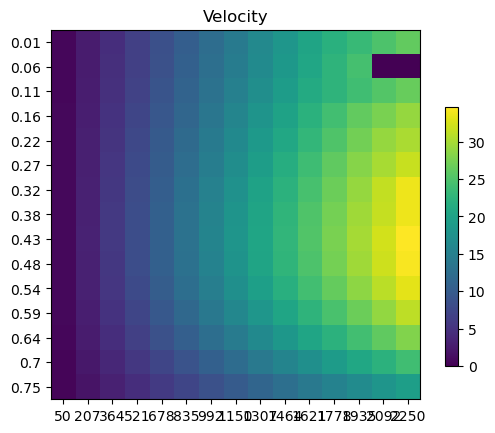

In [74]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
    press = np.round(np.linspace(50,2250,15),1)
    arr = np.empty((15, 15))
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        if cu ==0:
            u = np.loadtxt(i+file+"")
            cu += 1
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            if u[0] > 100 or u[0] < -100:
                u[:] = 0
            cu+=1
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_5_0.60/y_at_5.txt", "Velocity", yl='P delta', legend=True)

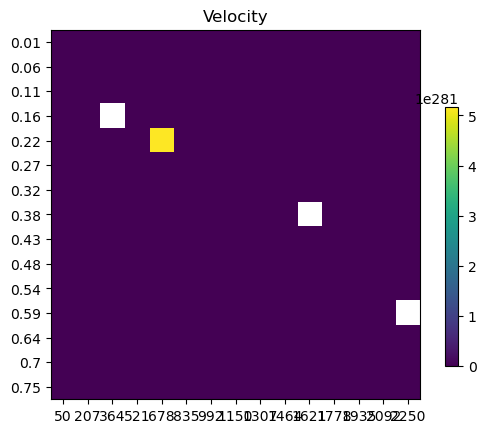

In [16]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cu = 0
    radii = np.array([.01,.06,.11,.16,.22,.27,.32,.38,.43,.48,.54,.59,.64,.70,.75])
    press = np.round(np.linspace(50,2250,15),1)
    arr = np.empty((15, 15))
    for i in datadir_list:
        #print(i+file)
        if "parametric2_canal" not in i:
            continue
        match = re.search(pt, i)
        match2 = re.search(pt2, i)
        extracted = match.group()
        extracted2 = match2.group()
        #print(extracted)
        #print(extracted2)
        if cu ==0:
            u = np.loadtxt(i+file+"")
            #print(i)
            #print(u)
            cu += 1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

        else:
            u = np.loadtxt(i+file)
            #print(i)
            #print(u)
            cu+=1
            #print(np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0])
            arr[np.where(radii==float(extracted))[0], np.where(press==float(extracted2))[0]] = np.max(u)

    neg = ax.imshow(arr)
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    #ax.set_xlabel(r'obstacle r', fontsize=14)
    #ax.set_ylabel(r'delta P', fontsize=14)

plot_mfl(pat, pat2, "/y_at_0_0.60/y_at_0.txt", "Velocity", yl='P delta', legend=True)

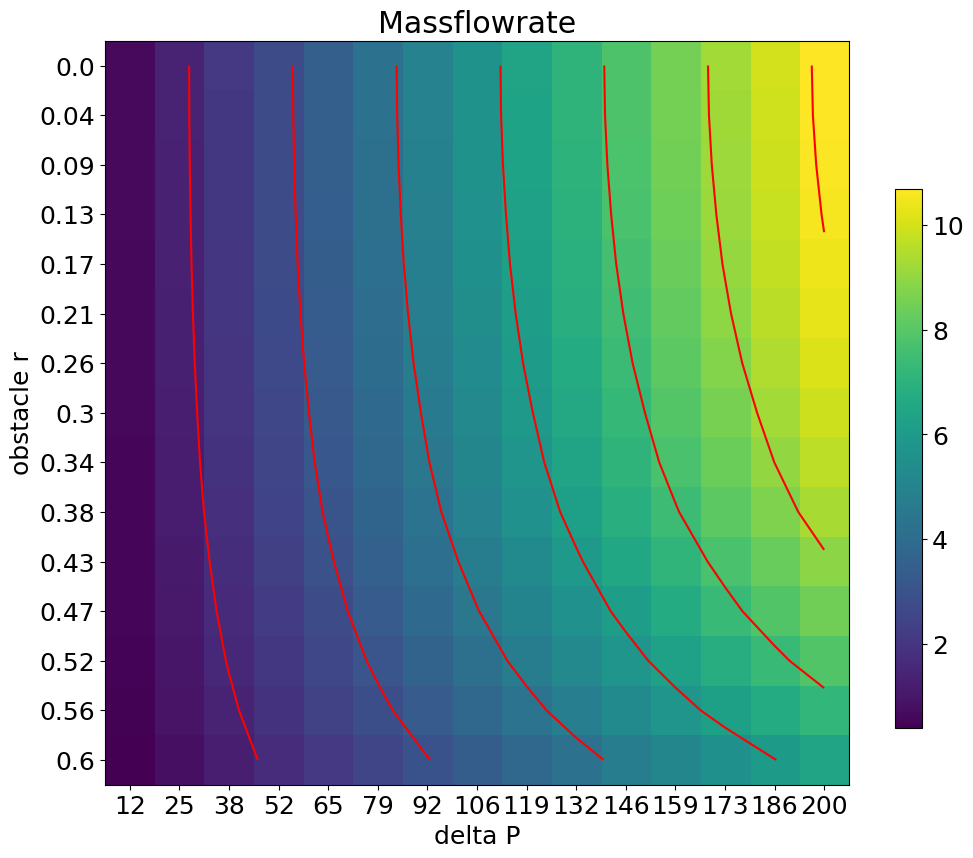

In [130]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'
plt.rcParams.update({'font.size': 18})
def plot_mfl(pt, pt2, file, title, yl='Velocity', legend=True, filename="output.pdf"):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_title(title)
    
    radii_list, press_list = [], []
    
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list


    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    # Create the arr with the correct dimensions
    arr = np.empty((len(radii), len(press)))
    
    # Second pass: fill the arr
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue

        match, match2 = re.search(pt, i), re.search(pt2, i)
        print("match", i) if match is None else None
        print("match2", i) if match2 is None else None      
        extracted, extracted2 = float(match.group()), float(match2.group())
        
        u = np.loadtxt(i+file)
        u = np.where((u >= -100) & (u <= 100), u, 0)     
        r_index, p_index = np.where(radii == extracted)[0][0], np.where(press == extracted2)[0][0]
       
        arr[r_index, p_index] = u[2]

    neg = ax.imshow(arr)
    ax.contour(arr, colors='red')
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press/10).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    ax.set_ylabel(r'obstacle r', fontsize=18)
    ax.set_xlabel(r'delta P', fontsize=18)
    fig.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')
    return arr, radii, press

arr, radii, press = plot_mfl(pat, pat2, "/flux_trapz_0.10/flux_trapz.txt", "Massflowrate", yl='P delta', legend=True,filename="flux_1.pdf")



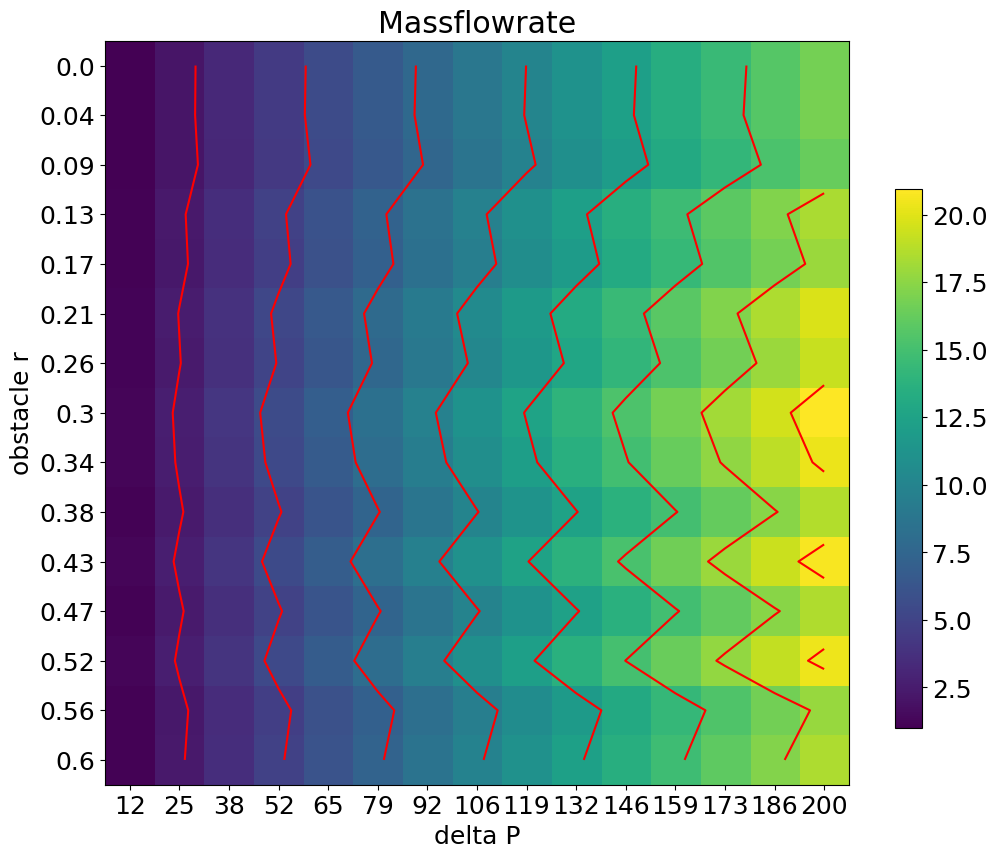

In [65]:
arr1, radii1, press1=plot_mfl(pat, pat2, "/flux_trapz_0.60/flux_trapz.txt", "Massflowrate", yl='P delta', legend=True, filename="flux_6.pdf")

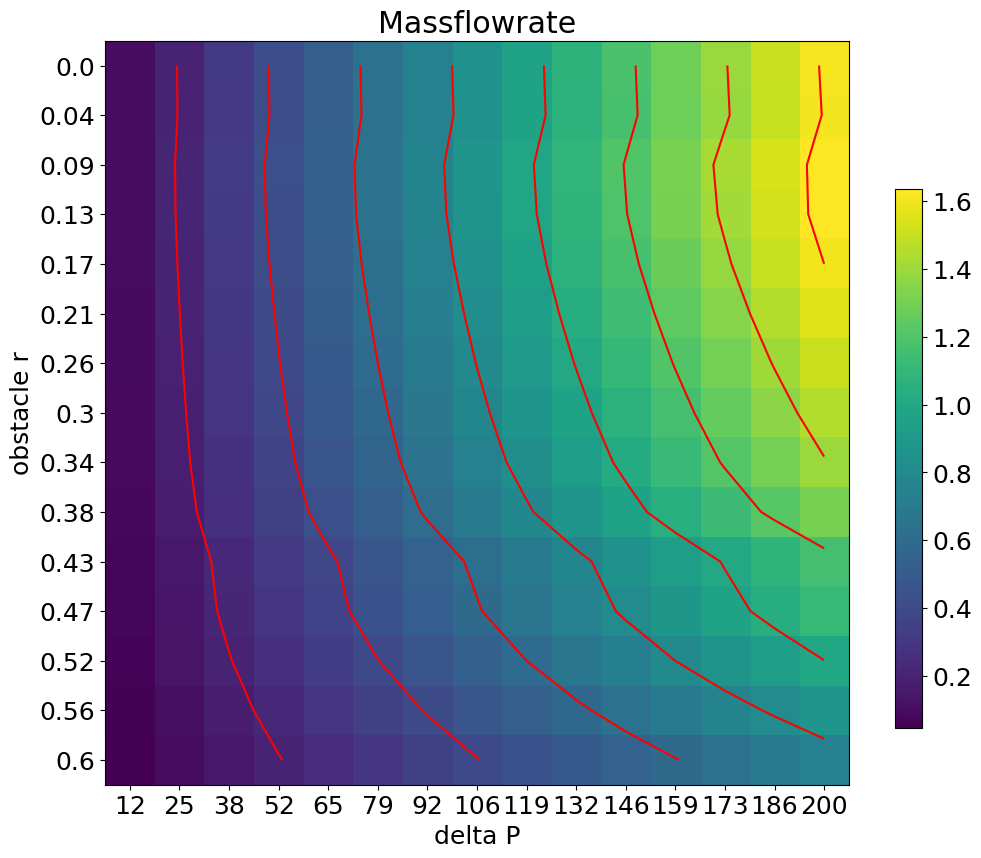

In [131]:
res, radii, press=plot_mfl(pat, pat2, "/massflowrate_0.60/massflowrate.txt", "Massflowrate", yl='P delta', legend=True, filename="mfl_6.pdf")

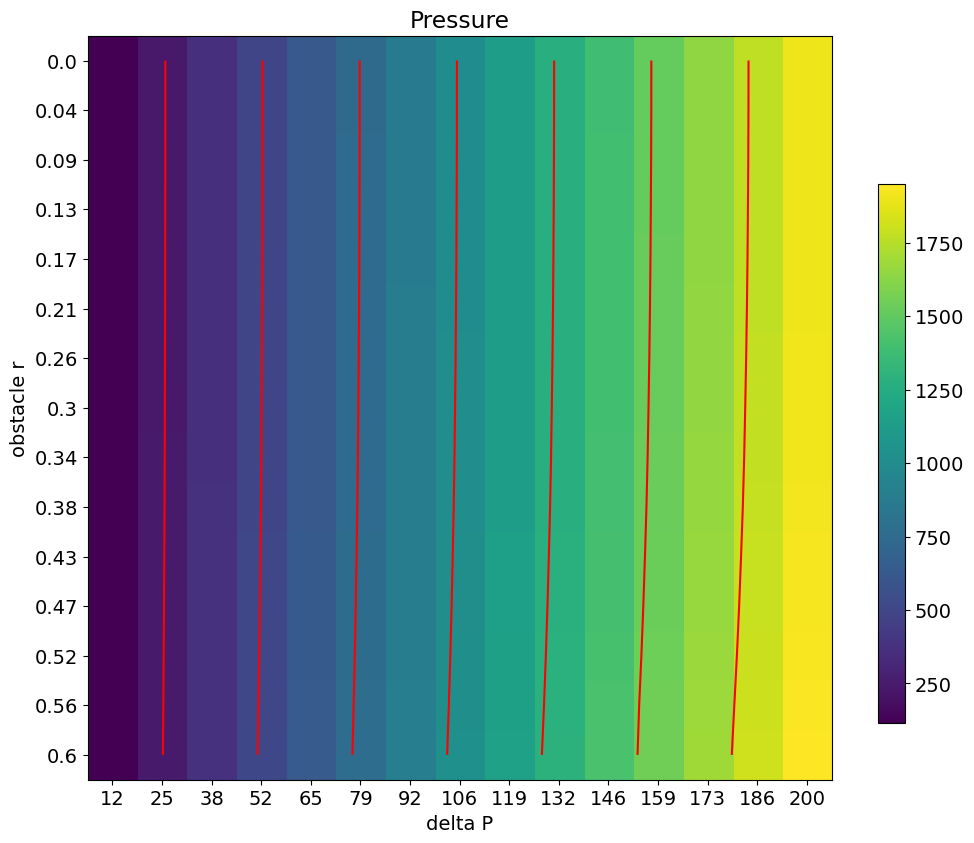

In [4]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'
plt.rcParams.update({'font.size': 14})
def plot_press(pt, pt2, file, title, yl='Velocity', legend=True, filename="output.pdf"):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_title(title)
    
    radii_list, press_list = [], []
    
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list


    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    # Create the arr with the correct dimensions
    arr = np.empty((len(radii), len(press)))
    
    # Second pass: fill the arr
    for i in datadir_list:
        if "parametric2_canal" not in i:
            continue

        match, match2 = re.search(pt, i), re.search(pt2, i)
        print("match", i) if match is None else None
        print("match2", i) if match2 is None else None      
        extracted, extracted2 = float(match.group()), float(match2.group())
        u = np.loadtxt(i+file)
        #u = np.where((u >= -100) & (u <= 100), u, 0)     
        r_index, p_index = np.where(radii == extracted)[0][0], np.where(press == extracted2)[0][0]
       
        arr[r_index, p_index] = u[5]

    neg = ax.imshow(arr)
    ax.contour(arr, colors='red')
    ax.set_xticks(np.arange(len(press)))
    ax.set_yticks(np.arange(len(radii)))
    ax.set_xticklabels((press/10).astype(int))
    ax.set_yticklabels(radii)
    fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    ax.set_ylabel(r'obstacle r', fontsize=14)
    ax.set_xlabel(r'delta P', fontsize=14)
    #fig.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')

plot_press(pat, pat2, "/p_at_0_0.10/p_at_0.txt", "Pressure", yl='P delta', legend=True,filename="pressure_1.pdf")


In [128]:
_= plot_press(pat, pat2, "/p_at_5_0.10/p_at_5.txt", "Pressure", yl='P delta', legend=True,filename="pressure_6.pdf")


NameError: name 'plot_press' is not defined

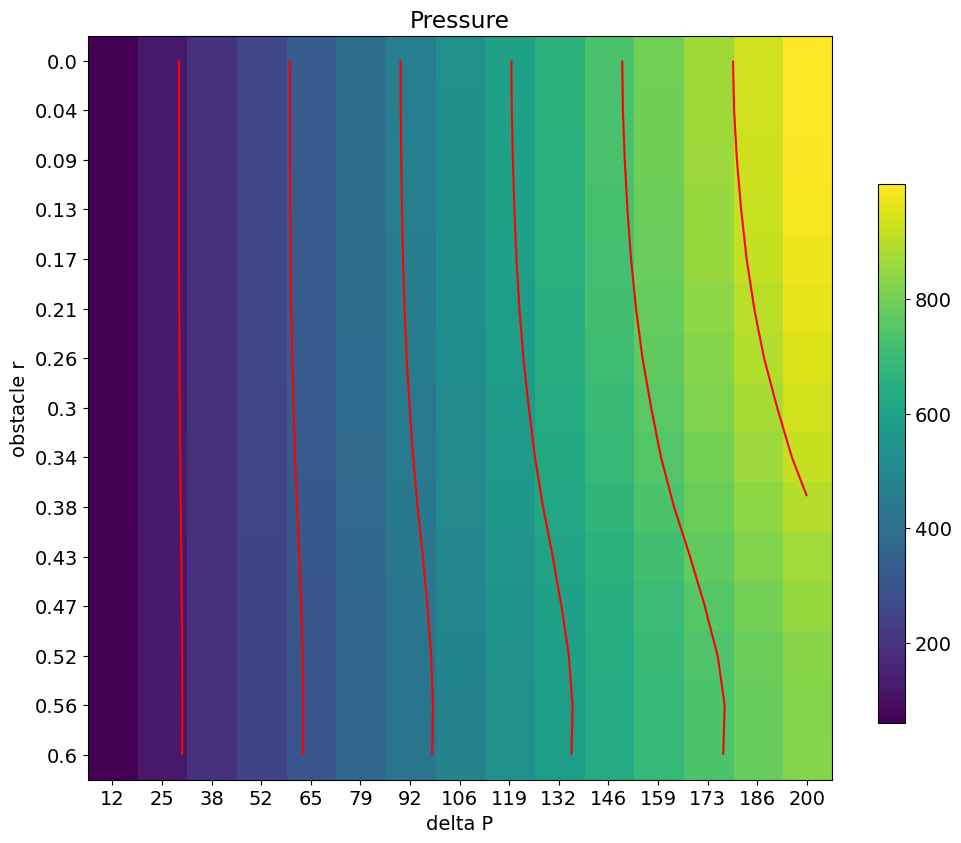

In [104]:
_=plot_press(pat, pat2, "/p_at_5_0.50/p_at_5.txt", "Pressure", yl='P delta', legend=True,filename="pressure_6.pdf")


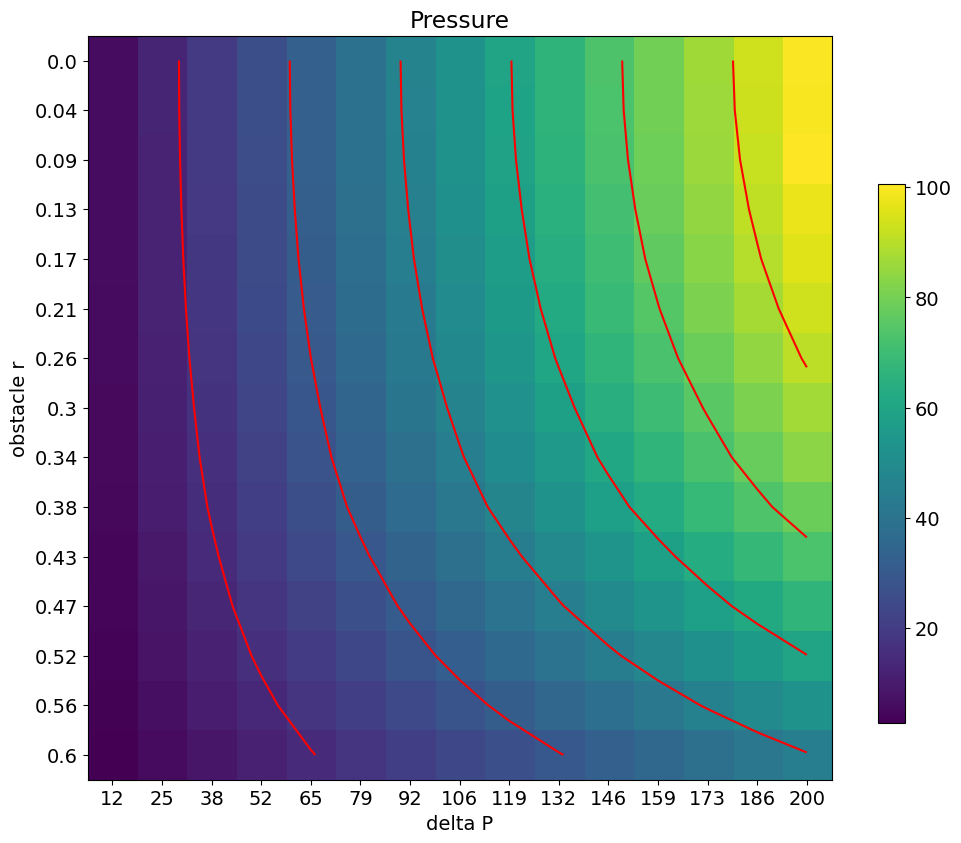

In [6]:
_=plot_press(pat, pat2, "/p_at_1_0.50/p_at_1.txt", "Pressure", yl='P delta', legend=True,filename="pressure_end_6.pdf")


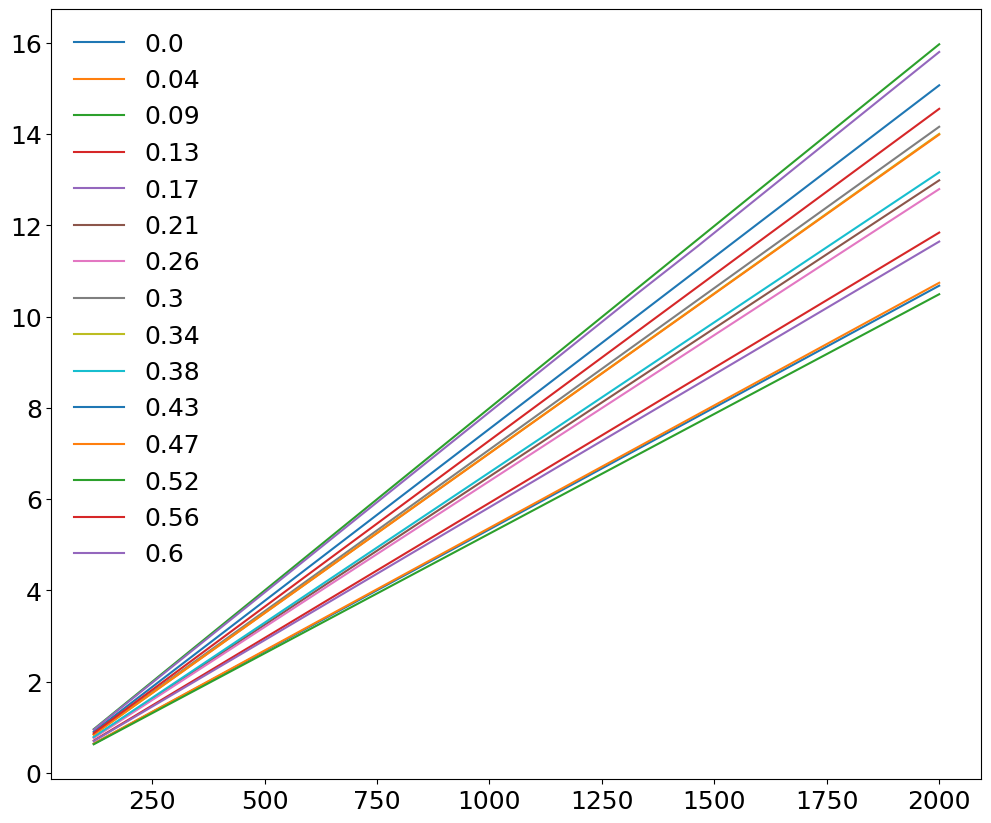

In [75]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(press, arr.T, label=radii)
ax.legend(frameon=False)
plt.show()

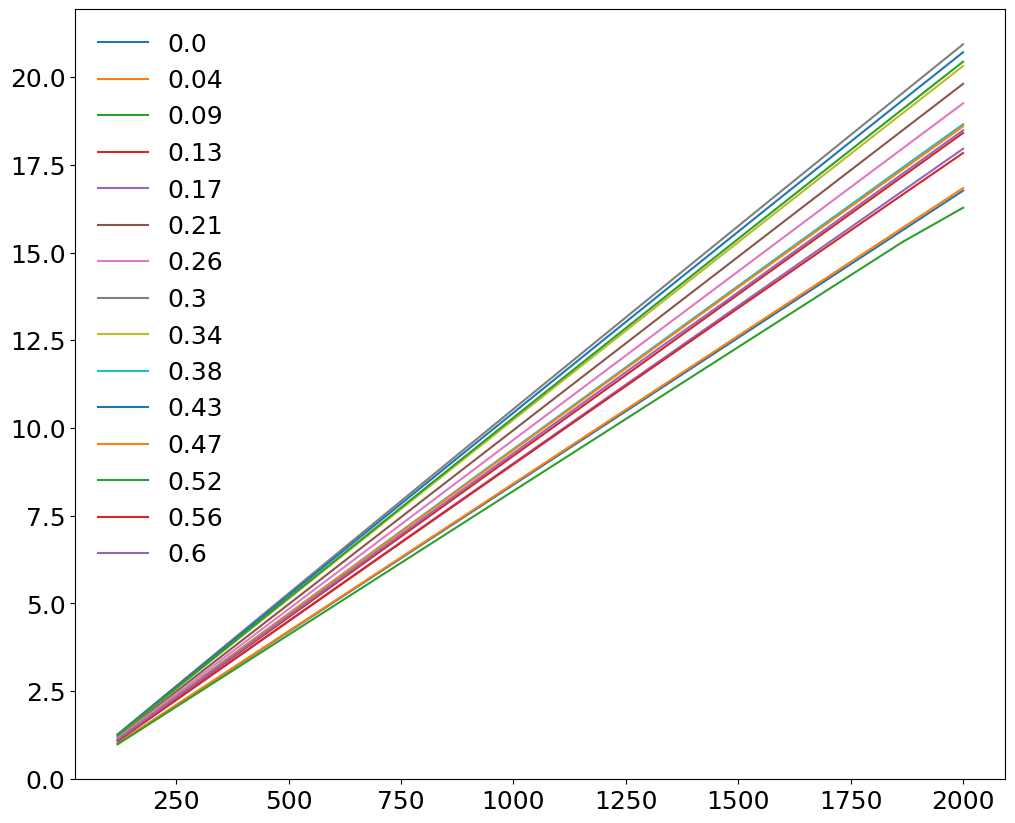

In [73]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(press1, arr1.T, label=radii1)
ax.legend(frameon=False)
plt.show()

In [81]:


def zetta(T, p0, pl, pg, L, x):
    """
    Calculate the zetta value for a given location in a membrane canal.

    This function computes the zetta value based on the pressures at different points
    of a membrane and the location within the canal.

    Parameters:
    -----------
    T : float
        The stiffness of the membrane
    p0 : float
        The pressure at the beginning of the membrane.
    pl : float
        The pressure at the end of the membrane.
    pg : float
        The outer pressure of the membrane.
    L : float
        The length of the membrane.
    x : float
        The location in the canal for which to calculate zetta.

    Returns:
    --------
    float
        The calculated zetta value at the given location.

    Notes:
    ------
    The function uses the following formula:
    zetta = 1/T * (1/2 * (pg - p0) * x**2 + pd/(6*L) * x**3 - 1/6 * (3*pg - 2*p0 - pl)* L* x)
    where pd = p0 - pl

    The constant T is not defined in the function and should be provided or defined elsewhere.

    Example:
    --------
    >>> zetta(100, 80, 120, 10, 5)
    # Returns the zetta value at the midpoint of a 10-unit long membrane
    """
    pd = p0-pl
    return 1/T * (1/2 * (pg - p0) * x**2 + pd/(6*L) * x**3 - 1/6 * (3*pg - 2*p0 - pl)* L * x )

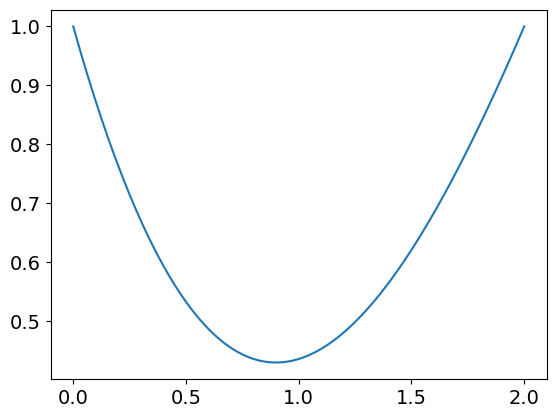

In [113]:
#zetta(T, p0, pl, pg, L, x):
x = np.linspace(0,2,100)
memb = -zetta(8, 1.9553851318e+03, 8.2760372899e+02, 1.9553851318e+03/4, 2, x)
plt.plot(x,1+memb*.01)
plt.show()

In [128]:
def define_membrane(factory, begin, end, l_tenth, l1, lc1):
    x = np.linspace(0,2,100)
    memb = -zetta(8, 1.9553851318e+03, 8.2760372899e+02, 1.9553851318e+03/4, 2, x)
    lines = []
    points = []
    for i in range(1,len(x)-1,len(x)-1):
        points.append(factory.addPoint(x[i-1],memb[i-1],0,lc1/10))
        points.append(factory.addPoint(x[i],memb[i],0, lc1/10))
        lines.append(factory.addLine(points[i-1],points[i]))
    lines.append(factory.addLine(begin,x[0]))
    lines.append(factory.addLine(x[-1],end))
    return lines, points

import gmsh
H=1
L=3
r=.3
Ox=1.5
lc=.03
model_rank = 0
infl, outfl, upper, lower = [],[],[],[]
if True: #comm.rank == model_rank:
    gmsh.initialize()
    gmsh.model.add("canal")
    
    cm = 1 # e-02 # not needed for our sim
    h1 = H * cm
    l1 = L * cm
    r = r * cm
    Lc1 = lc
    l_tenth = L/10 * cm
    
    # We start by defining some points and some lines. To make the code shorter we
    # can redefine a namespace:
    factory = gmsh.model.geo
    model = gmsh.model
    
    factory.addPoint(0, 0, 0, Lc1, 1)
    factory.addPoint(l1, 0, 0, Lc1, 2)
    factory.addPoint(l1, h1 , 0, Lc1, 3)
    factory.addPoint(0, h1, 0, Lc1, 4)
    
    begin = factory.addPoint(Ox-l_tenth, h1, 0, Lc1, 5)
    end = factory.addPoint(Ox+l_tenth, h1, 0, Lc1, 7)
    
    factory.addLine(1, 2, 8)
    factory.addLine(2, 3, 9)
    factory.addLine(3, 7, 10)
    factory.addLine(5, 4, 11)
    factory.addLine(4, 1, 12)
    
    # add obstacle form
    lines, points = define_membrane(factory, begin, end, l_tenth, l1, Lc1)
    # factory.addCircleArc(5, 6, 7, 13)
    
    # Define the inner curve loop (the circle arc)
    factory.addCurveLoop([-13], lines)
    
    # Define the outer curve loop
    factory.addCurveLoop([8, 9, 10, -13, 11, 12], 15)
    
    # Create the plane surface with a hole
    factory.addPlaneSurface([15], 16)
    factory.synchronize()
    
    upper = model.addPhysicalGroup(1, [10, -13, 11])
    model.setPhysicalName(1, upper, "upper_wall")
    outfl = model.addPhysicalGroup(1, [9])
    model.setPhysicalName(1, outfl, "outflow")
    infl = model.addPhysicalGroup(1, [12])
    model.setPhysicalName(1, infl, "inflow")
    lower = model.addPhysicalGroup(1, [8])
    model.setPhysicalName(1, lower, "lower_wall")

    gmsh.model.addPhysicalGroup(2, [16], tag=5, name="Domain")
    factory.synchronize()
    gmsh.model.mesh.generate(2)
    gmsh.write("mesh.msh")
#infl = comm.bcast(infl, root=0)
#outfl = comm.bcast(outfl, root=0)
#upper = comm.bcast(upper, root=0)
#lower = comm.bcast(lower, root=0)
#gmsh.model = comm.bcast(gmsh.model, root=0)
#mesh, ct, ft = gmshio.model_to_mesh(gmsh.model, comm, model_rank,gdim=2)
#return mesh, ct, ft, infl, outfl, upper, lower

TypeError: 'numpy.float64' object cannot be interpreted as an integer

[77.0688086  23.08009371 22.30914092 22.19584976 22.12571377 48.23647354
 22.1469267  22.2180273  22.32791439 47.15917179 22.46894805 22.63664223
 22.82699455 46.13589635 23.03857603 23.27000157 45.06167853 23.51999735
 23.78816417 44.05823942 24.07394707 24.37917991 43.0405399  24.69882878
 42.05086339 25.04020544 25.39949812 41.08254637 25.77665042 26.1769305
 40.13481315 26.59316642 39.20432718 27.0354848  27.49437379 38.31084817
 27.98022839 37.42880753 28.4871925  36.58260503 29.01665924 35.75953671
 29.57602336 30.15207943 34.96228961 30.76059836 34.19347853 31.39348392
 33.45349834 32.05266322 32.73863177]
[67.04929957 33.18480713 31.81383546 49.03013947 32.03970227 48.53760469
 32.09553342 48.04077949 32.24850366 32.42994068 47.54930281 32.63135176
 47.06003026 32.85408561 46.57701963 33.08535046 46.09286184 33.33470917
 45.62279649 33.58835021 45.14270913 33.85563198 44.67929048 34.13068294
 44.21374185 34.41159065 34.70529709 43.76238869 35.00042709 43.30273688
 35.30844354 4

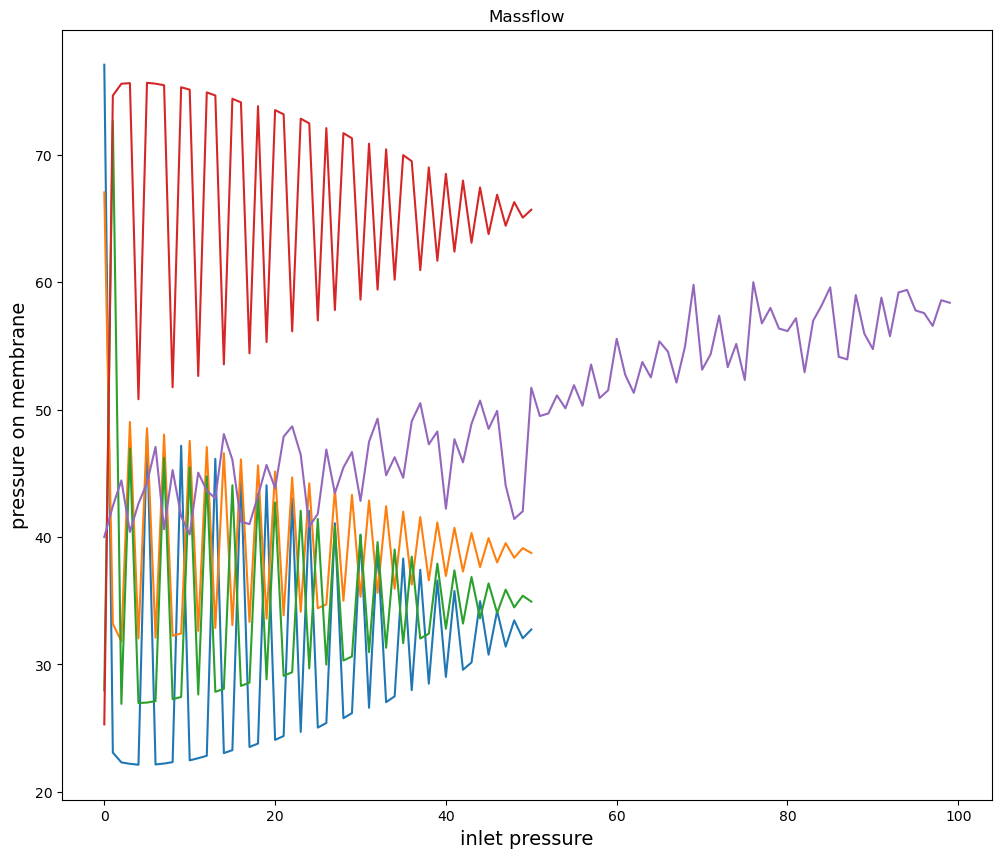

In [38]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'

def plot_press(pt, pt2, file, title, yl='Velocity', legend=True, filename="output.pdf"):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_title(title)
    
    radii_list, press_list = [], []
    
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        if "iterative_canal_" not in i:
            continue
        match, match2 = re.search(pt, i), re.search(pt2, i)
        
        if match and match2:
            radius, pressure = float(match.group()), float(match2.group())
            
            radii_list = radii_list + [radius] if radius not in radii_list else radii_list
            press_list = press_list + [pressure] if pressure not in press_list else press_list


    radii, press = np.sort(np.array(radii_list)), np.sort(np.array(press_list))
    # Create the arr with the correct dimensions
    arr = np.empty((len(radii), len(press)))
    
    # Second pass: fill the arr
    for i in datadir_list:
        if "iterative_canal_" not in i:
            continue

        match, match2 = re.search(pt, i), re.search(pt2, i)
        print("match", i) if match is None else None
        print("match2", i) if match2 is None else None      
        extracted, extracted2 = float(match.group()), float(match2.group())
        u = np.loadtxt(i+file)
        print(u)
        #u = np.where((u >= -100) & (u <= 100), u, 0)     
        r_index, p_index = np.where(radii == extracted)[0][0], np.where(press == extracted2)[0][0]

        ax.plot(u)
        #arr[r_index, p_index] = np.mean(u)
    print(radii, press)
    print(arr.shape)
    #neg = ax.plot(arr)
    #ax.contour(arr, colors='red')
    #ax.set_xticklabels((press/10).astype(int))
    #ax.set_yticklabels(radii)
    #fig.colorbar(neg, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7)
    #if legend:
    #    ax.legend()
    ax.set_ylabel(r'pressure on membrane', fontsize=14)
    ax.set_xlabel(r'inlet pressure', fontsize=14)
    #fig.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')


plot_press(pat, pat2, "/p_courve_0.80/p_courve.txt", "Massflow", yl='P delta', legend=True)